# Problem Statement

Parkinsons-Disease analysis and prediction



The data & attributes information for this project is available at -   https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/Links to an external site.

In [53]:
#Import all the necessary modules
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# Q1. Load the Parkinson Data file into Python DataFrame. 


Let us assume the data frame is named wine_df
Answer-1:

In [54]:
parkinson_data= pd.read_csv("parkinsons.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2 Missing values and outlier treatment

In [169]:
print('Printing datatype of each column')
print(parkinson_data.info())

Printing datatype of each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spre

In [170]:
#ignoring_feature_Columnname
df = parkinson_data.loc[:, parkinson_data.columns != 'name']
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [172]:
#Removing outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

MDVP:Fo(Hz)         65.197000
MDVP:Fhi(Hz)        89.343000
MDVP:Flo(Hz)        55.727500
MDVP:Jitter(%)       0.003905
MDVP:Jitter(Abs)     0.000040
MDVP:RAP             0.002175
MDVP:PPQ             0.002095
Jitter:DDP           0.006520
MDVP:Shimmer         0.021380
MDVP:Shimmer(dB)     0.201500
Shimmer:APQ3         0.012020
Shimmer:APQ5         0.012800
MDVP:APQ             0.016320
Shimmer:DDA          0.036060
NHR                  0.019715
HNR                  5.877500
status               0.000000
RPDE                 0.166256
DFA                  0.087124
spread1              1.403904
spread2              0.104883
D2                   0.537330
PPE                  0.115529
dtype: float64


In [176]:
print('Printing shape of each column after outlier treatment') #Column1 feature name is ignored
print(df_out.shape)

Printing shape of each column after outlier treatment
(114, 23)


# Q3Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

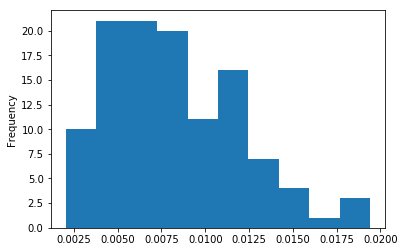

In [159]:
df_out['Jitter:DDP'].plot.hist()
#Data is left skewed; not5 fairly distr

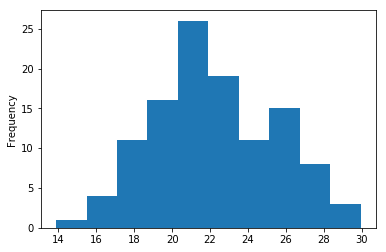

In [162]:
df_out['HNR'].plot.hist()
#Data is neither left skewed nor right skewed;  fairly-balanced

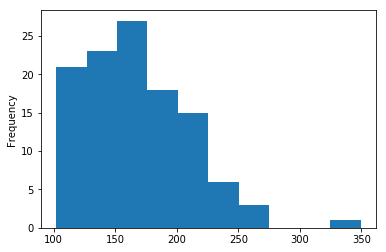

In [163]:
df_out['MDVP:Fhi(Hz)'].plot.hist()

In [178]:
df_out.corr()
#to understand corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.772636,0.364821,-0.244673,-0.606360,-0.189027,-0.316729,-0.189003,-0.183530,-0.209651,...,-0.171996,-0.135176,0.072410,NaN,-0.389497,-0.428769,-0.367459,-0.058893,0.359290,-0.383265
MDVP:Fhi(Hz),0.772636,1.000000,0.126676,-0.077533,-0.375582,-0.099526,-0.124401,-0.099578,-0.109878,-0.111984,...,-0.114988,-0.030004,-0.017057,NaN,-0.192064,-0.386874,-0.191005,0.032127,0.270697,-0.182771
MDVP:Flo(Hz),0.364821,0.126676,1.000000,-0.413651,-0.449061,-0.371567,-0.345370,-0.371371,-0.303665,-0.333527,...,-0.288307,-0.393455,0.267012,NaN,-0.421224,0.088086,-0.336250,-0.060177,0.064480,-0.325505
MDVP:Jitter(%),-0.244673,-0.077533,-0.413651,1.000000,0.883929,0.966021,0.949840,0.966027,0.506028,0.544039,...,0.502203,0.591169,-0.539965,NaN,0.421388,0.253088,0.640587,0.100279,0.008618,0.654245
MDVP:Jitter(Abs),-0.606360,-0.375582,-0.449061,0.883929,1.000000,0.824704,0.890913,0.824706,0.454651,0.503494,...,0.448429,0.480595,-0.436658,NaN,0.483434,0.393392,0.682647,0.162917,-0.129889,0.710744
MDVP:RAP,-0.189027,-0.099526,-0.371567,0.966021,0.824704,1.000000,0.887114,0.999998,0.484551,0.519003,...,0.493490,0.605629,-0.532908,NaN,0.385436,0.219925,0.530937,0.006381,0.032030,0.519413
MDVP:PPQ,-0.316729,-0.124401,-0.345370,0.949840,0.890913,0.887114,1.000000,0.887113,0.531990,0.570562,...,0.521149,0.467397,-0.555316,NaN,0.400857,0.425422,0.682803,0.143601,-0.059328,0.744462
Jitter:DDP,-0.189003,-0.099578,-0.371371,0.966027,0.824706,0.999998,0.887113,1.000000,0.484454,0.518897,...,0.493406,0.605535,-0.532823,NaN,0.385373,0.219997,0.531061,0.006296,0.031939,0.519561
MDVP:Shimmer,-0.183530,-0.109878,-0.303665,0.506028,0.454651,0.484551,0.531990,0.484454,1.000000,0.986936,...,0.982985,0.622121,-0.750360,NaN,0.484806,0.086210,0.473944,0.214986,0.162102,0.474488
MDVP:Shimmer(dB),-0.209651,-0.111984,-0.333527,0.544039,0.503494,0.519003,0.570562,0.518897,0.986936,1.000000,...,0.966363,0.614752,-0.731076,NaN,0.458921,0.103351,0.464279,0.189497,0.127439,0.468867


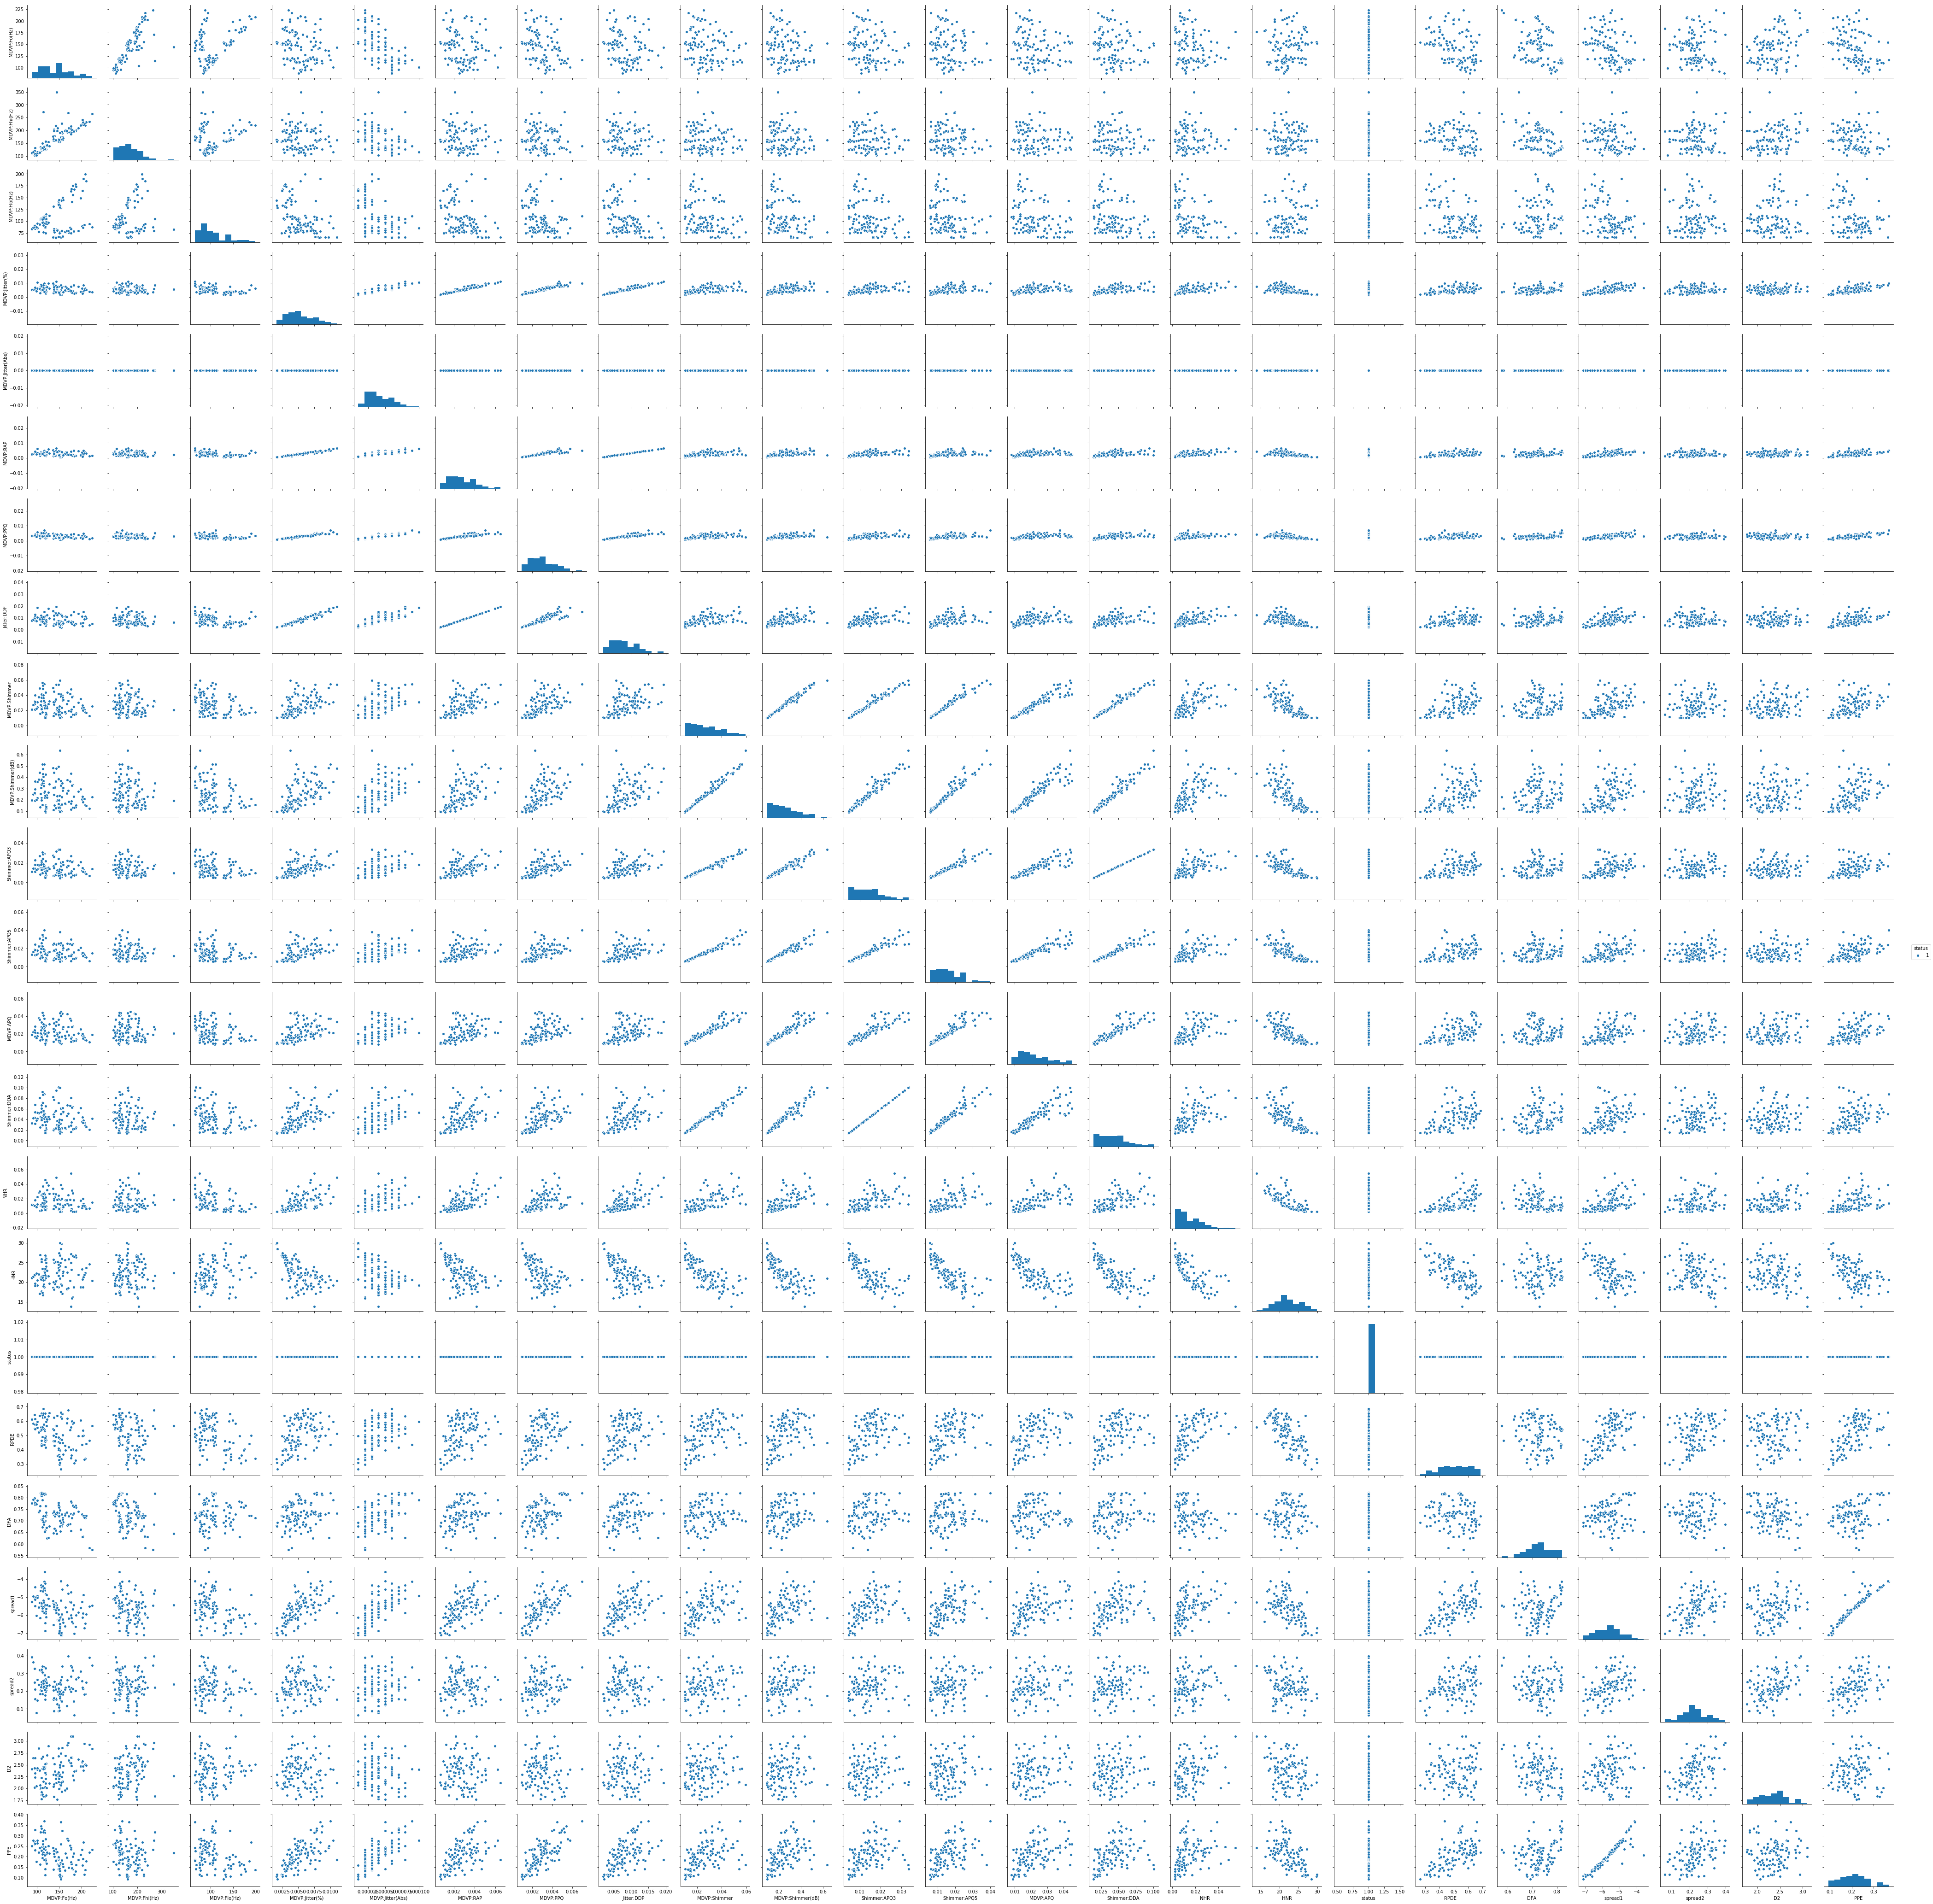

In [168]:
sns.pairplot(df_out, hue = "status")
#Multivariant analysis
#Correlation b/w Jitter and Shimmer is depicted
#Jitter has strong co-relation with Parkinsons disease

# Q4 Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [213]:
feature_cols = list(df_out.columns[0:15]) + list(df_out.columns[17:])
target_col = df_out.columns[16]
X= parkinson_data[feature_cols]
Y= parkinson_data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.30)

# Q5 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [214]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q6 Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [215]:
#Accuracy of the model
print('Accuracy of the model')
print(dt_model.score(X_test , y_test))
print(dt_model.score(X_train , y_train))

Accuracy of the model
0.8813559322033898
1.0


In [216]:
#confusion matrix
print('Confusion matix')
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

Confusion matix
[[13  3]
 [ 4 39]]


# Q7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

In [248]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,min_samples_leaf=2) 


#max_depth:3;min_samples_leaf=2;test:0.84;train:0.86
#max_depth:4;min_samples_leaf=2;test:0.84;train:0.92
#max_depth:5;min_samples_leaf=2;test:0.84train:0.99
#max_depth:6;min_samples_leaf=2;test:0.796;train:0.977
#max_depth:4;min_samples_leaf=3;test:0.69;train:0.92
#max_depth:6;min_samples_leaf=3;test:0.76;train:0.985
#max_depth:7;min_samples_leaf=4;test:0.83;train:0.963
#max_depth:7;min_samples_leaf=2;test:0.83;train:0.98

dt_model.fit(X_train, y_train)

print('Accuracy of the test model',dt_model.score(X_test , y_test))

print('Accuracy of the training model',dt_model.score(X_train , y_train))

Accuracy of the test model 0.847457627118644
Accuracy of the training model 0.9926470588235294


In [247]:
#For maximum depth 5 and minimum sample leaf 2 , accuracy is 88% for test model and 99% for training model.

# Q8 Apply the Random forest model and print the accuracy of Random forest Model

In [254]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 200)
rfcl = rfcl.fit(X_train, y_train)

In [257]:
y_predict = rfcl.predict(X_test)

#n=100;accuracy=0.8644
#n=50;accuracy=0.881
#n=10;accuracy=0.847
#n=25;accuracy=0.893
#n=30;accuracy=0.898

print('Accuracy')
print(rfcl.score(X_test , y_test))

print('Confusion matrix')
print(metrics.confusion_matrix(y_test, y_predict))

Accuracy
0.8813559322033898
Confusion matrix
[[12  4]
 [ 3 40]]


In [258]:
#By implementing Random forest for n=200, accuracy is boosted to 89%